Import dependencies and pretrained model

In [2]:
!pip install tensorflow-hub

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.17.0 requires gin-config, which is not installed.
tf-models-official 2.17.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.17.0 requires immutabledict, which is not installed.
tf-models-official 2.17.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.17.0 requires oauth2client, which is not installed.
tf-models-official 2.17.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.17.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.17.0 requires sentencepiece, which is not installed.
tf-models-official 2.17.0 requires seqeval, which is not installed.
tf-models-official 2.17.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.17.0 requires tensorflow-model-optimi

In [3]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [4]:
model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Preprocess image and load

In [6]:
def  load_img(img_path):
    img=tf.io.read_file(img_path)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.convert_image_dtype(img,tf.float32)
    img=img[tf.newaxis,:]#making sure that the image IS INSIDE THE NEW  array
    return img

In [9]:
content_img=load_img('profile.jpg')
style_img=load_img('monet.jpeg')

2.Visualise output

In [11]:
content_img.shape

TensorShape([1, 720, 1280, 3])

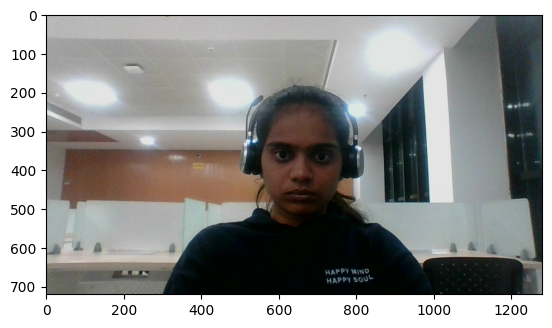

In [10]:
plt.imshow(np.squeeze(content_img))#np.squeeze to get the image out of the array we set up before
plt.show()

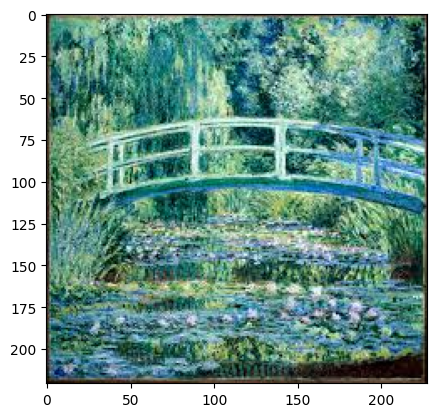

In [13]:
plt.imshow(np.squeeze(style_img))#np.squeeze to get the image out of the array we set up before
plt.show()

3.Stylized Image

In [14]:
stylized_img=model(tf.constant(content_img),tf.constant(style_img))[0]

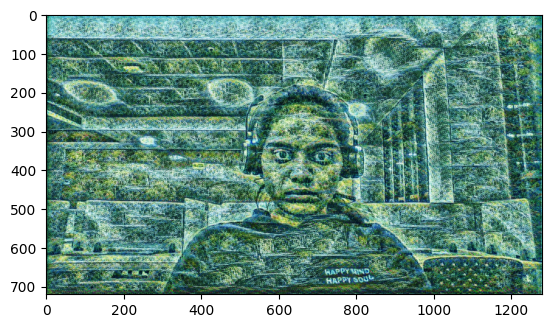

In [15]:
plt.imshow(np.squeeze(stylized_img))#np.squeeze to get the image out of the array we set up before
plt.show()

In [16]:
cv2.imwrite('montestyletransfer_generated.jpg',cv2.cvtColor(np.squeeze(stylized_img)*255,cv2.COLOR_BGR2RGB))#we are multiplying bu 255 to reverse the normalization that the neural transfer algo4ritm does

True

In [21]:
style2_img=load_img('andy.png')

In [22]:
stylized_img2=model(tf.constant(content_img),tf.constant(style2_img))

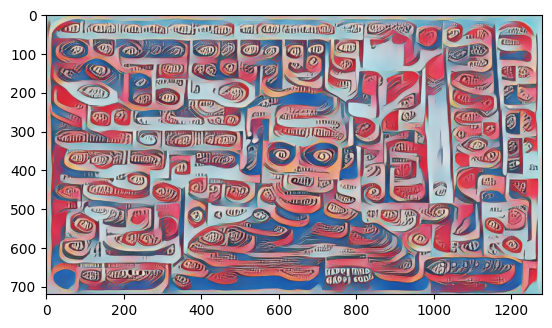

In [24]:
plt.imshow(np.squeeze(stylized_img2))#np.squeeze to get the image out of the array we set up before
plt.show()

In [25]:
style_img3=load_img('frida.jpg')
stylized_img3=model(tf.constant(content_img),tf.constant(style_img3))

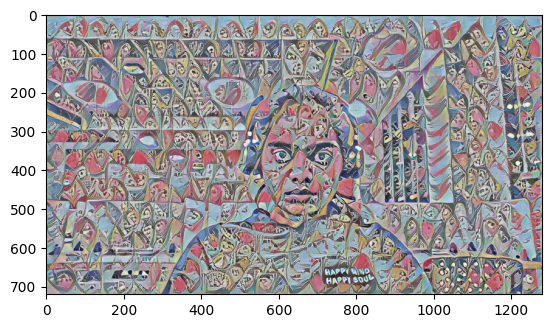

In [26]:
plt.imshow(np.squeeze(stylized_img3))#np.squeeze to get the image out of the array we set up before
plt.show()

In [29]:
content_img2=load_img('park.jpeg')
stylized_img4=model(tf.constant(content_img2),tf.constant(style_img3))

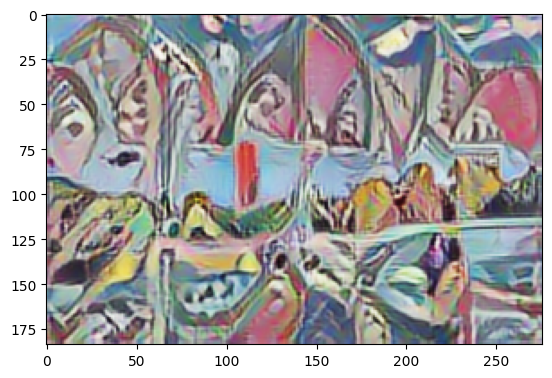

In [30]:
plt.imshow(np.squeeze(stylized_img4))#np.squeeze to get the image out of the array we set up before
plt.show()

In [31]:
style_img4=load_img('vangogh.jpeg')
stylized_img5=model(tf.constant(content_img2),tf.constant(style_img4))

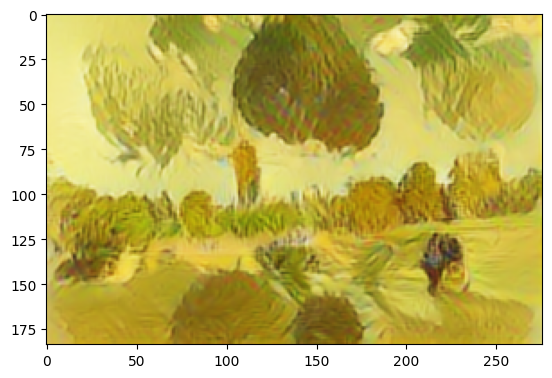

In [32]:
plt.imshow(np.squeeze(stylized_img5))#np.squeeze to get the image out of the array we set up before
plt.show()